# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


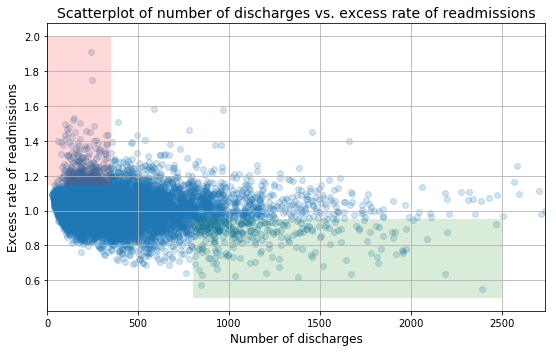

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

### A. Do you agree with the above analysis and recommendations? Why or why not?

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
****
*-> The first point is very hard to tell on the graph above, especially considering the handfull of outliers in the upper left area, shaded red. Ideally, a correlation and/or regression line should be used to confirm a trend.*
*- For the second two points these are specific statements about only a subsection of the data.  Better would be to categorize 'number of discharges' into low and high, for example, and test whether they are different (e.g. t test).*

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

****
*-> These are likely accurate statements, but don't seem to originate from statistical tests. If the given threshold values are important, then again, a t-test could be performed to check difference in proportion of excess readmission greater than 1.*

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

****
*-> I see no evidence in the report that suggests significant correlation of any factors. A significance test is required.  The interpretation of this 'result' is therefore misleading.*

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
*-> Again, these applications of the 'analysis' are very misleading since they are not based on any significance test.*

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

B1. Setup an appropriate hypothesis test.

Based on the direction of the provided report, it seems the critical issue is whether the excess readmissions ratio is larger or smaller depending on the size of the hospital. Although we aren't given the size (e.g. number of beds) for each hospital, we are given number of discharges. This number is most likely well correlated with hospital size.  The above analysis makes policy implications based on the theshold of 300 discharges, so I will use this same threshold in my own analysis. 

Given the data, an appropriate hypothesis test would be:

**Null hypothesis:** Excess readmission ratio for hospitals with discharge rates less than 300 ("small") is the same as that for hospitals with discharge rates greater than 300 ("large").

**Alternative hypothesis:** Excess readmission ratio for hospitals with discharge rates less than 300 ("small") is NOT the same as that for hospitals with discharge rates greater than 300 ("large").

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
#subset dataframe by threshold value 300
small_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300]
large_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 300]

In [8]:
#define series and means to be used in analysis for excess readmission ratio
small_ratio = small_df['Excess Readmission Ratio']
large_ratio = large_df['Excess Readmission Ratio']

small_ratio_mean = np.mean(small_df['Excess Readmission Ratio'])
large_ratio_mean = np.mean(large_df['Excess Readmission Ratio'])

#define series for discharge values
small_disch = small_df['Number of Discharges']
large_disch = large_df['Number of Discharges']

B2. Compute and report the observed significance value (or p-value).


In [20]:
# Define mean difference
mean_diff = small_ratio_mean - large_ratio_mean 
print('Mean difference',mean_diff)

Mean difference 0.014457168378321783


In [15]:
# Print sample size
print(str(large_ratio.shape[0]))
print(str(small_ratio.shape[0]))

5365
6189


In [11]:
SE = mean_diff / np.sqrt(small_ratio.var()/small_ratio.size + large_ratio.var()/large_ratio.size)
print("Standard error:", SE)

Standard error: 8.33381793751


In [14]:
p_val = 2*(1-stats.norm.cdf(np.abs(SE)))
p_val

0.0

This p-value is <0.05, and we can accept the alternative hypothesis that readmission rates are different between small and large hospitals.

B3. Report statistical significance for $\alpha$ = .01.


The p-value also passes the test when considering $\alpha$ = .01.

B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?


In [21]:
# Calculate relative difference between groups, percent difference
mean_diff_perc = (mean_diff/small_ratio_mean) * 100
print('Mean percent difference',mean_diff_perc)

Mean percent difference 1.4254213856956723


In [22]:
# Calculate confidence interval
small_conf = [small_ratio.mean()-stats.norm.ppf(0.975)*small_ratio.std()/np.sqrt(small_ratio.size),
              small_ratio.mean()+stats.norm.ppf(0.975)*small_ratio.std()/np.sqrt(small_ratio.size)]
large_conf = [large_ratio.mean()-stats.norm.ppf(0.975)*large_ratio.std()/np.sqrt(large_ratio.size),
              large_ratio.mean()+stats.norm.ppf(0.975)*large_ratio.std()/np.sqrt(large_ratio.size)]
print("95% Confidence interval, small hospitals:",small_conf)
print("95% Confidence interval, large hospitals:",large_conf)

95% Confidence interval, small hospitals: [1.0121833766411212, 1.0162930477203678]
95% Confidence interval, large hospitals: [0.9970721513462748, 1.0024899362585706]


- The mean difference between the two sizes of hospital was 0.014. The increase in readmission for smaller hospitals was about 1% greater than for larger hospitals.  
- While the confidence intervals for readmission rates for small and large hospitals are not overlapping, they are very close.
- Because the difference in readmission rates is so small, it may NOT be worth spending time and money on addressing this in the manner suggested in the previous analysis, which went as far as suggesting hospital closures. This seems extreme when considering the minor differences.

B5. Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

Advantages: 
- clear labels (axis and chart title)
- scatter plot style usually allows reader to see all data points

Disadvantages:
- shaded areas are misleading
- plot is crowded, and so it is hard to gather information about the general trends (a trendline might help)
- data are not segmented by categories of interest (e.g. small and large hospitals)

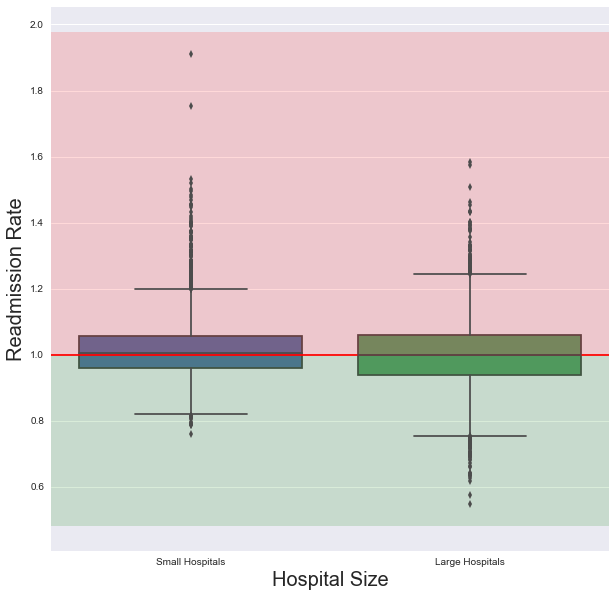

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=[small_df['Excess Readmission Ratio'],large_df['Excess Readmission Ratio']])
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
labels=['Small Hospitals','Large Hospitals']
plt.hlines(y=1.0,xmin=xmin,xmax=xmax,color='r')
ax.set_xlabel('Hospital Size',fontsize=20)
ax.set_ylabel('Readmission Rate',fontsize=20)
ax.set_xticklabels(labels)
ax.fill_between([xmin,xmax], 1,ymax, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([xmin,xmax], ymin, 1, facecolor='green', alpha = .15, interpolate=True)

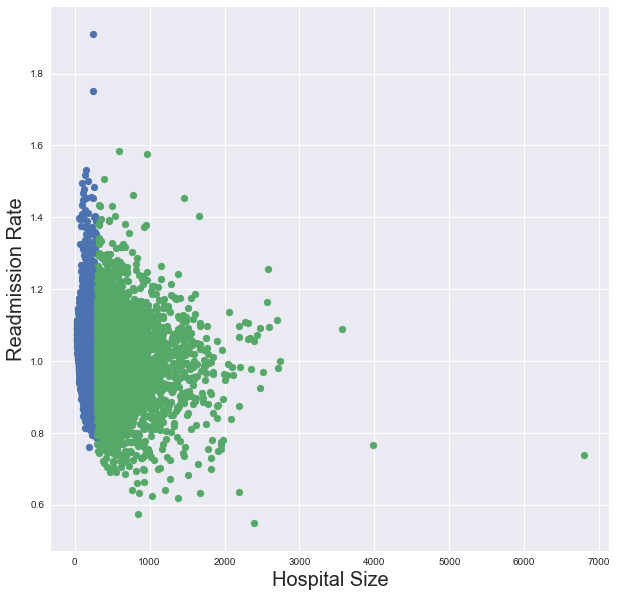

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=[small_df['Number of Discharges']], y=[small_df['Excess Readmission Ratio']])
plt.scatter(x=[large_df['Number of Discharges']], y=[large_df['Excess Readmission Ratio']])
ax.set_xlabel('Hospital Size',fontsize=20)
ax.set_ylabel('Readmission Rate',fontsize=20)

The box plot makes it easier to see the threshold for the ratio of readmissions (red line at 1), and you can visualize the spead of the data.  

The color coded scatter plot shows the distinction in hospital size for the raw data.